**Ghena Obeidat 0218332**

**Sabreen Al-Najjar 0211918**

# Dataset Description

**1- Dataset name:** Adult income dataset

**2- Number of Features =** 14

**3- Number of Instances =** 48842

**4- Target Column =** "income"

**5- Balance Ratio (min/max):** 0.31

# Get and prepare the data

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
data=pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
data.info()
data.describe(include="all").T.head(25) #first 25 rows of summary , .T transpose 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Standardize missing values and trim strings
# Replace "?" with NaN and strip whitespace
data = data.replace("?", np.nan)
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].str.strip()

In [21]:
# Prints the correlation matrix for all numeric columns in the DataFrame.
corr_matrix=data.corr(numeric_only=True)
print (corr_matrix)

                      age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.076628         0.030940      0.077229   
fnlwgt          -0.076628  1.000000        -0.038761     -0.003706   
educational-num  0.030940 -0.038761         1.000000      0.125146   
capital-gain     0.077229 -0.003706         0.125146      1.000000   
capital-loss     0.056944 -0.004366         0.080972     -0.031441   
hours-per-week   0.071558 -0.013519         0.143689      0.082157   

                 capital-loss  hours-per-week  
age                  0.056944        0.071558  
fnlwgt              -0.004366       -0.013519  
educational-num      0.080972        0.143689  
capital-gain        -0.031441        0.082157  
capital-loss         1.000000        0.054467  
hours-per-week       0.054467        1.000000  


In [22]:
target_col = "income"

# Features and labels
X = data.drop(columns=[target_col])
y = data[target_col].map({">50K": 1, "<=50K": 0}).copy() 


# count number of missing values descending
na_counts = data.isna().sum().sort_values(ascending=False)
print("Columns with missing values\n", na_counts)


Columns with missing values
 occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [24]:
#Identify numeric and categorical columns
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
print("numeric columns:",num_cols)
print("categorical columns:",cat_cols)

numeric columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [25]:
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),     # numeric imputation
    ("scaler", StandardScaler())                       
])

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # categorical imputation
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ]
)

Xt_train = preprocess.fit_transform(X_train)
Xt_test = preprocess.transform(X_test)

print("Transformed train shape:", Xt_train.shape)
print("Any NaNs left in transformed train?", np.isnan(Xt_train).any())
print("Any NaNs left in transformed test?", np.isnan(Xt_test).any())

Transformed train shape: (39073, 105)
Any NaNs left in transformed train? False
Any NaNs left in transformed test? False


# Discover and Visualize the Data to Gain Insights

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

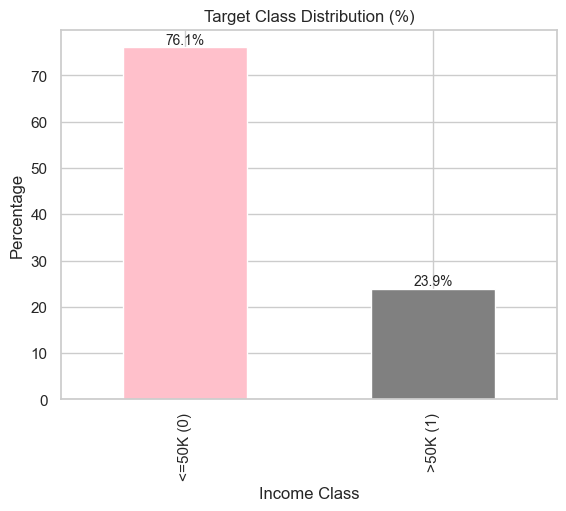

In [27]:
#Target class distribution plot
sns.set(style="whitegrid", context="notebook")
target_col = "income"

ax = (data[target_col]
      .value_counts(normalize=True)
      .mul(100)
      .rename({">50K": ">50K (1)", "<=50K": "<=50K (0)"})
      .plot(kind="bar", color=["pink", "gray"]))
plt.title("Target Class Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Income Class")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.show()

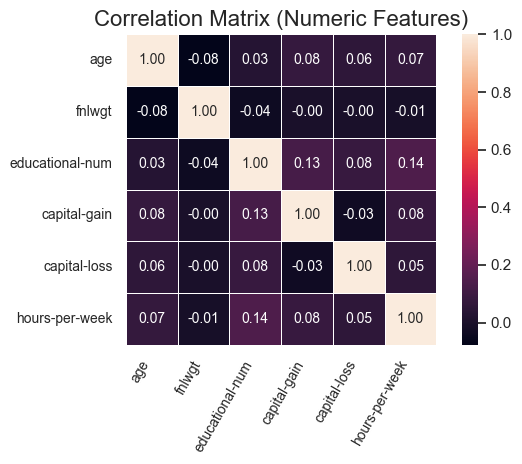

In [28]:
#Correlation heatmap (numeric features)

sns.set(style="whitegrid", context="notebook")

sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",
    linewidths=0.5,
    square=True,
    annot_kws={"size": 10}
)
plt.title("Correlation Matrix (Numeric Features)", fontsize=16)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

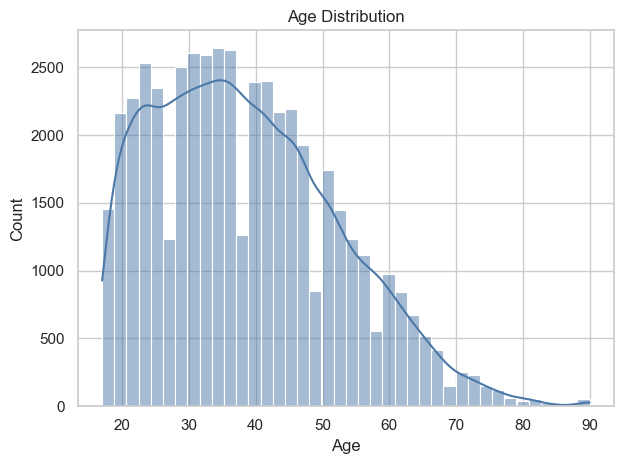

In [29]:
#Age Distribution plot

sns.histplot(data=data, x="age", bins=40, kde=True, color="#4C78A8")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

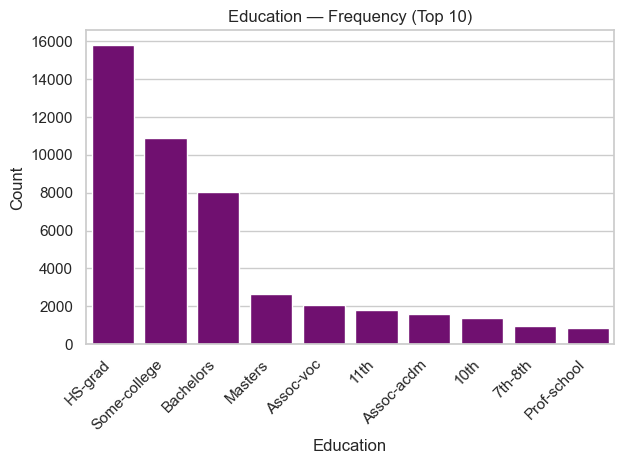

In [30]:
#Bar plot: education (top 10 categories)

top_edu = data["education"].value_counts().head(10).index
sns.countplot(data=data[data["education"].isin(top_edu)], x="education", order=top_edu, color="purple")
plt.title("Education — Frequency (Top 10)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Education")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

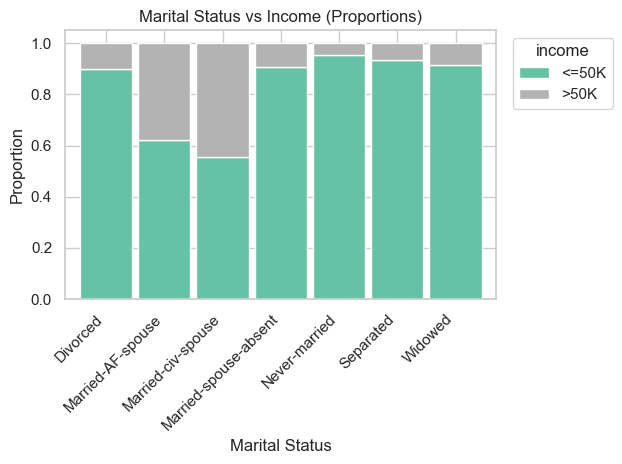

In [31]:
#Stacked proportions: marital-status vs income 

ct = pd.crosstab(data["marital-status"], data[target_col], normalize="index")
ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).index]  

ct.plot(kind="bar", stacked=True, colormap="Set2", width=0.9)
plt.title("Marital Status vs Income (Proportions)")
plt.ylabel("Proportion")
plt.xlabel("Marital Status")
plt.xticks(rotation=45, ha="right")
plt.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

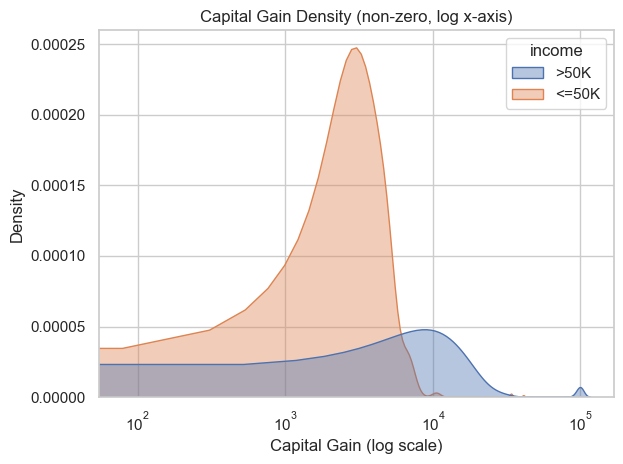

In [32]:
#Capital Gain Density by Income (Non‑Zero, Log)

nonzero = data[data["capital-gain"] > 0].copy()

sns.kdeplot(
    data=nonzero, x="capital-gain",
    hue="income", common_norm=False, fill=True,
    alpha=0.4, bw_method="scott"
)
plt.xscale("log")
plt.title("Capital Gain Density (non-zero, log x-axis)")
plt.xlabel("Capital Gain (log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

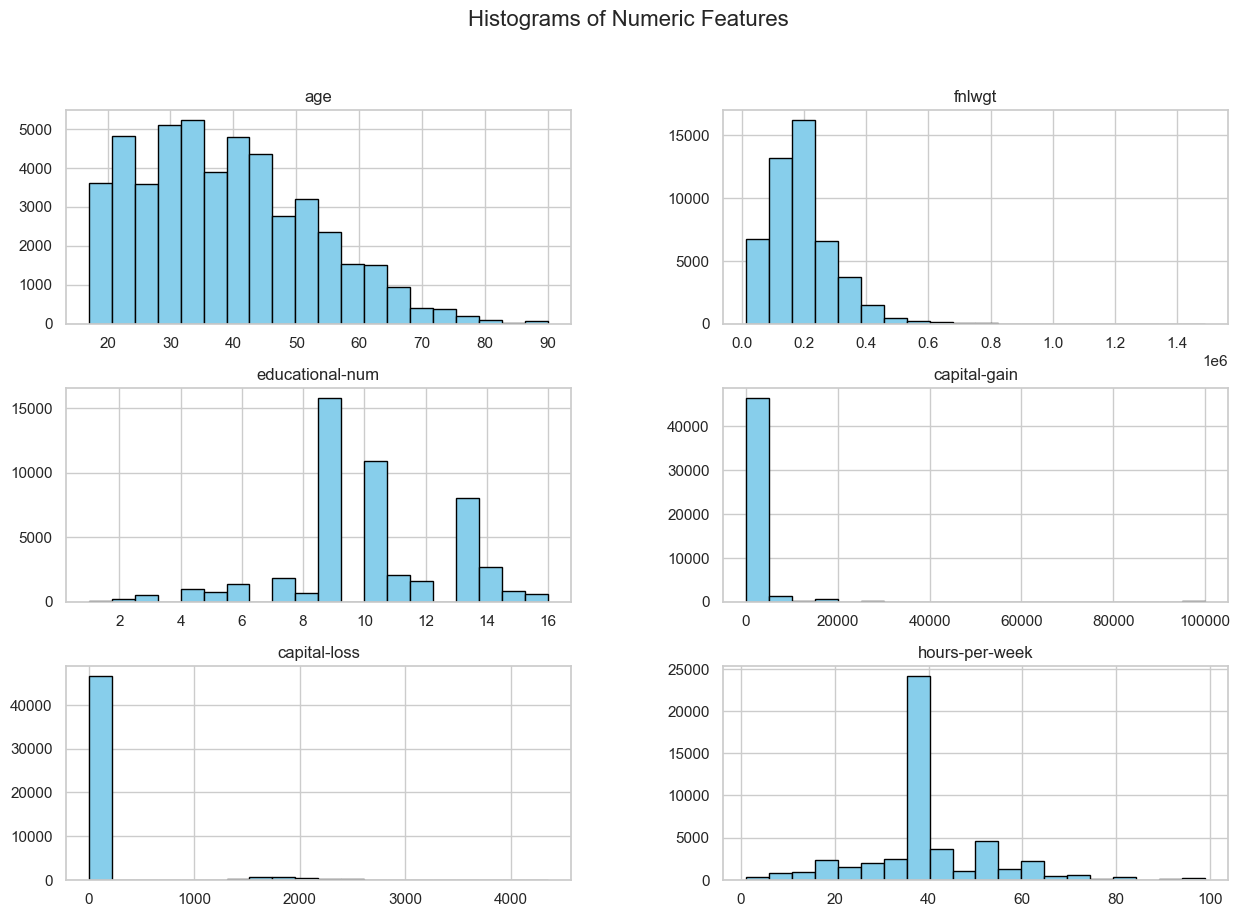

In [33]:
# Histograms for numeric features
data[num_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

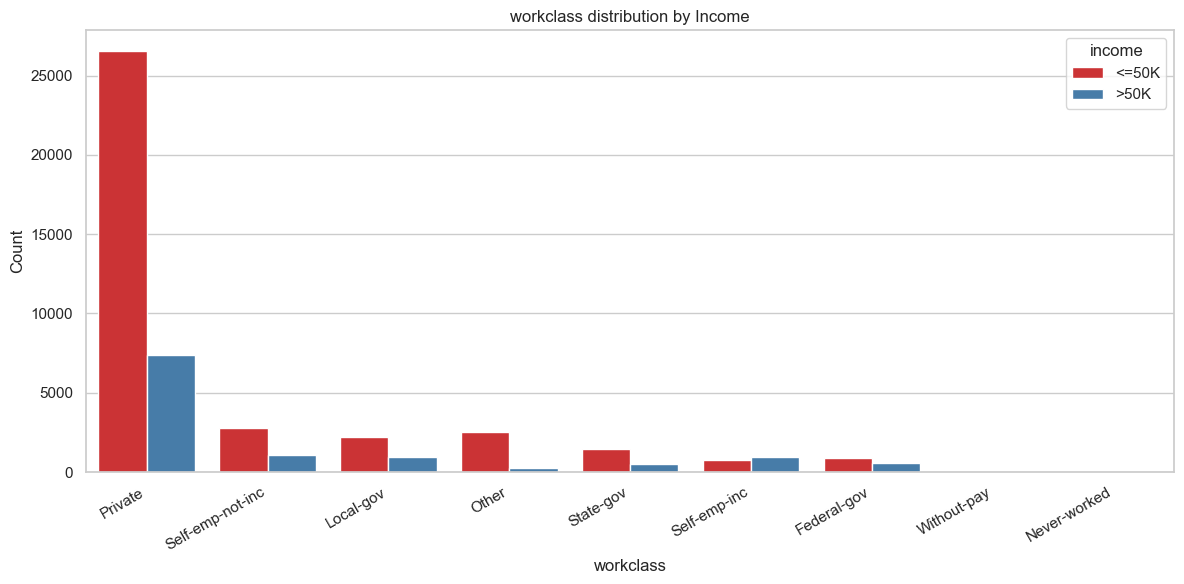

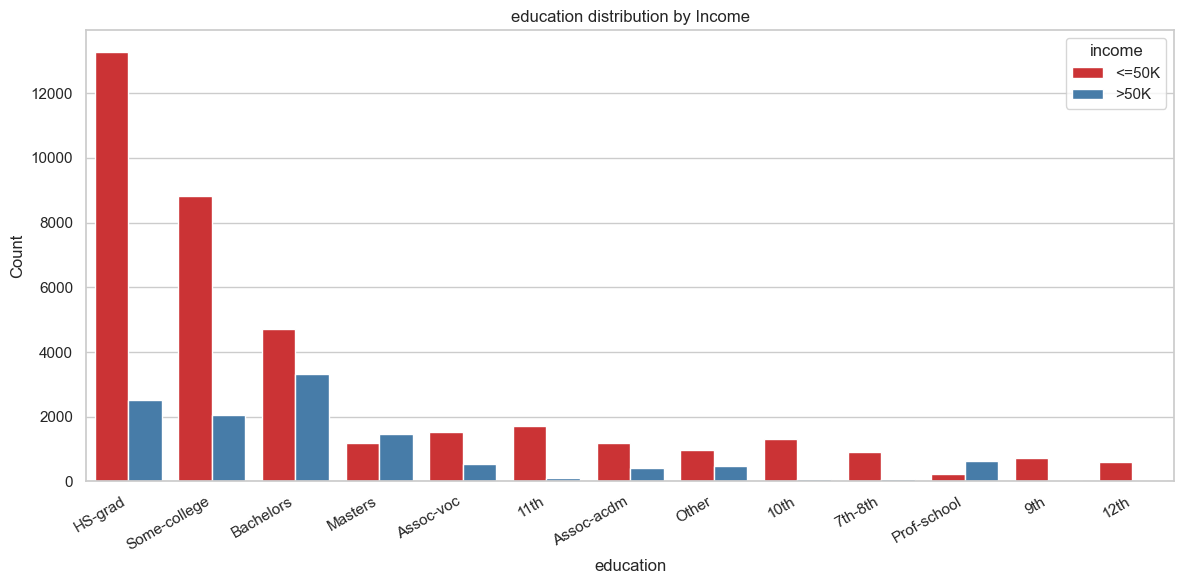

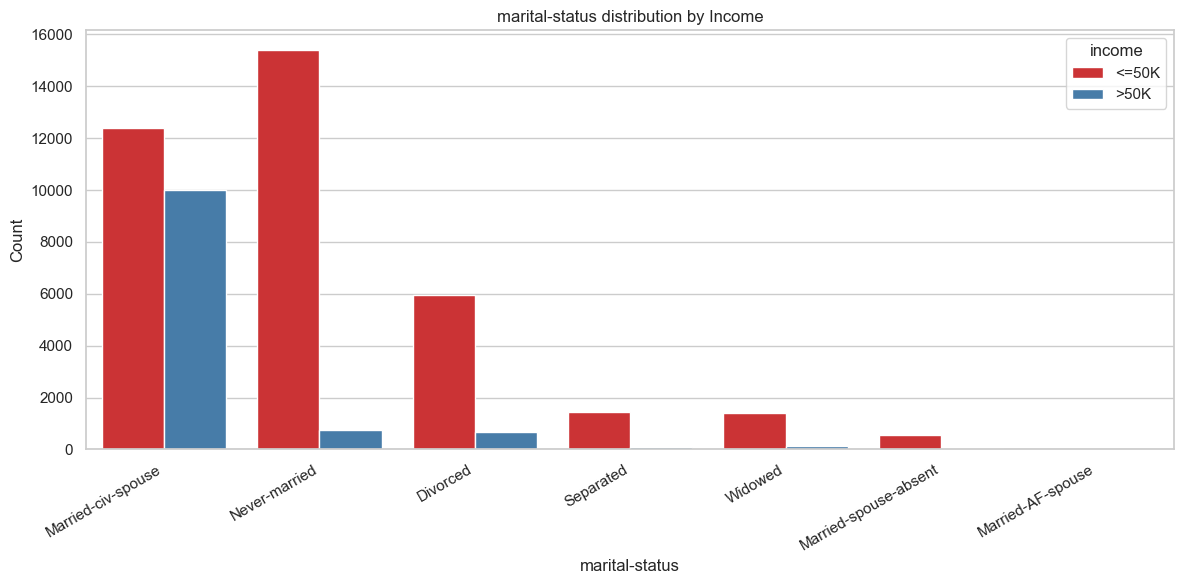

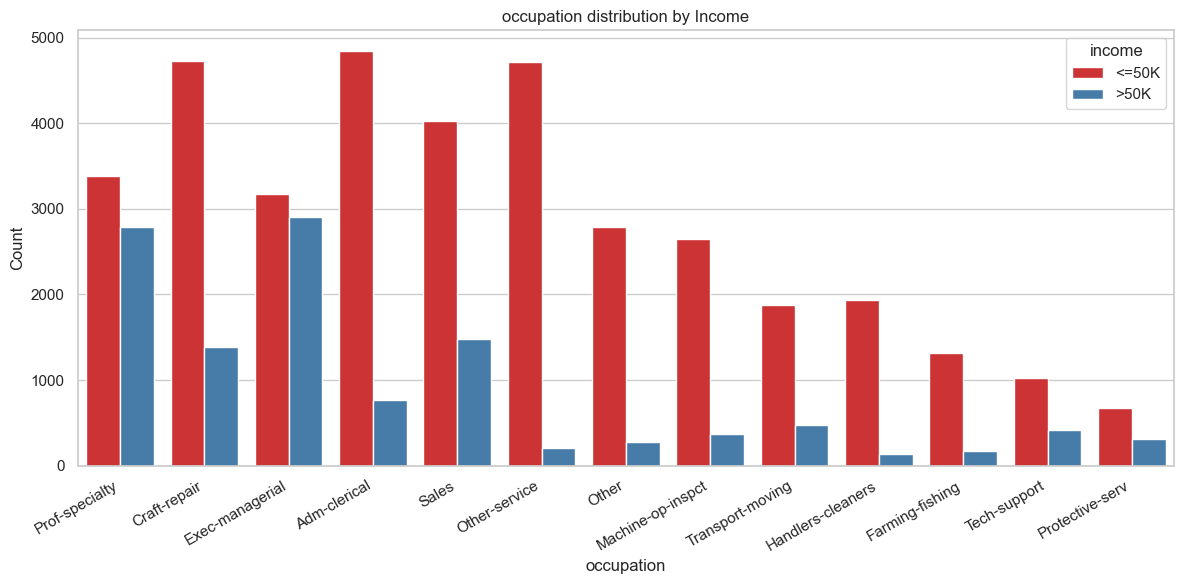

In [34]:
# Bar plots for categorical features (distribution of categories)


TOP_K = 12  # number of categories to show per feature

for col in cat_cols[:4]:
    dfp = data[[col, target_col]].copy()
    # group rare categories into "Other"
    top_vals = dfp[col].value_counts().head(TOP_K).index
    dfp[col] = np.where(dfp[col].isin(top_vals), dfp[col], "Other")
    # order by total frequency (descending)
    order = dfp[col].value_counts().index

    plt.figure(figsize=(12,6))
    sns.countplot(data=dfp, x=col, hue=target_col, order=order, palette="Set1")
    plt.title(f"{col} distribution by Income")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


# Train Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
# Build full pipeline: preprocess + model
log_reg_clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [37]:
log_reg_clf.fit(X_train, y_train) #train

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
y_pred = log_reg_clf.predict(X_test) #predict

In [39]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [40]:
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 

In [41]:
print(f"Accuracy: {acc:.3f}")
print(f"Precision (class 1): {precision:.3f}")
print(f"Recall (class 1): {recall:.3f}")
print("Confusion matrix:\n", cm)

Accuracy: 0.807
Precision (class 1): 0.565
Recall (class 1): 0.844
Confusion matrix:
 [[5912 1519]
 [ 364 1974]]


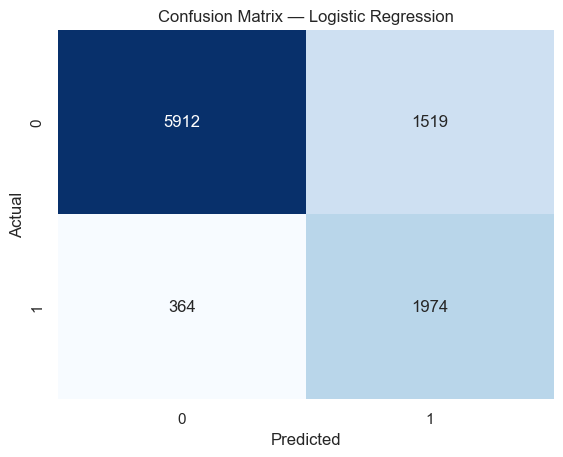

In [42]:
#confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optimizing Decision Threshold for High Precision (Logistic Regression)

In [43]:
y_prob_lr = log_reg_clf.predict_proba(X_test)[:, 1]
candidates_lr = [0.50, 0.55, 0.60, 0.65,0.8]
best_lr = None

In [44]:
for thr in candidates_lr:
    y_pred_thr = (y_prob_lr >= thr).astype(int)
    acc = accuracy_score(y_test, y_pred_thr)
    cm = confusion_matrix(y_test, y_pred_thr)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    print(f"[LR] thr={thr:.2f} -> Acc: {acc:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, CM: {cm.tolist()}")
    if best_lr is None or precision > best_lr[0]:
        best_lr = (precision, recall, acc, thr, cm.tolist())

[LR] thr=0.50 -> Acc: 0.807, Precision: 0.565, Recall: 0.844, CM: [[5912, 1519], [364, 1974]]
[LR] thr=0.55 -> Acc: 0.823, Precision: 0.596, Recall: 0.808, CM: [[6151, 1280], [450, 1888]]
[LR] thr=0.60 -> Acc: 0.834, Precision: 0.626, Recall: 0.765, CM: [[6362, 1069], [549, 1789]]
[LR] thr=0.65 -> Acc: 0.846, Precision: 0.665, Recall: 0.721, CM: [[6582, 849], [653, 1685]]
[LR] thr=0.80 -> Acc: 0.849, Precision: 0.762, Recall: 0.538, CM: [[7039, 392], [1080, 1258]]


In [45]:
print("\n[LR] Best by precision:", {"precision": round(best_lr[0],3), "recall": round(best_lr[1],3), "acc": round(best_lr[2],3), "thr": best_lr[3], "cm": best_lr[4]})


[LR] Best by precision: {'precision': 0.762, 'recall': 0.538, 'acc': 0.849, 'thr': 0.8, 'cm': [[7039, 392], [1080, 1258]]}


In [46]:
CHOSEN_THR_LR = float(best_lr[3])

In [47]:
y_pred_final_lr = (y_prob_lr >= CHOSEN_THR_LR).astype(int)
acc_lr_final = accuracy_score(y_test, y_pred_final_lr)
cm_lr_final = confusion_matrix(y_test, y_pred_final_lr)

In [48]:
tn, fp, fn, tp = cm_lr_final.ravel()
precision_lr_final = tp / (tp + fp) 
recall_lr_final    = tp / (tp + fn) 

print(f"[LR] Final (thr={CHOSEN_THR_LR:.2f}) -> Acc: {acc_lr_final:.3f}, Precision: {precision_lr_final:.3f}, Recall: {recall_lr_final:.3f}")


[LR] Final (thr=0.80) -> Acc: 0.849, Precision: 0.762, Recall: 0.538


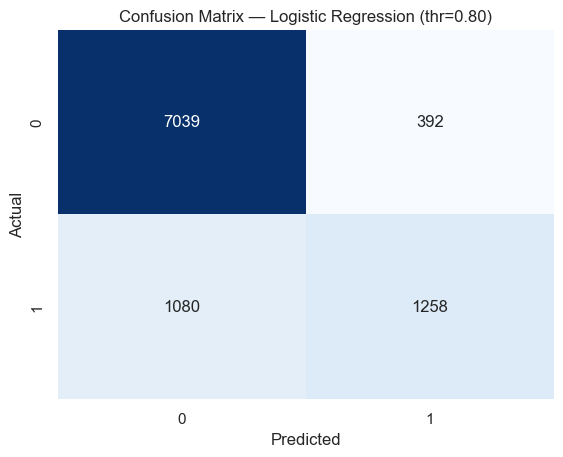

In [49]:
sns.heatmap(cm_lr_final, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — Logistic Regression (thr={CHOSEN_THR_LR:.2f})")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

#We conclude that increasing threshold from 0.50 to 0.65 doesn’t flip any predictionsm so we tried higher threshold like 0.80 .

# Train Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1,
        class_weight="balanced_subsample",
        random_state=42
    ))
])

In [52]:
rf_clf.fit(X_train, y_train) #train

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
y_pred_rf = rf_clf.predict(X_test) #predict

In [54]:
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [55]:
tn, fp, fn, tp = cm_rf.ravel()
precision_rf = tp / (tp + fp) 
recall_rf = tp / (tp + fn) 

In [56]:
print(f"Random Forest — Accuracy: {acc_rf:.3f}")
print(f"Random Forest — Precision (class 1): {precision_rf:.3f}")
print(f"Random Forest — Recall (class 1): {recall_rf:.3f}")
print("Random Forest — Confusion matrix:\n", cm_rf)

Random Forest — Accuracy: 0.857
Random Forest — Precision (class 1): 0.740
Random Forest — Recall (class 1): 0.622
Random Forest — Confusion matrix:
 [[6921  510]
 [ 883 1455]]


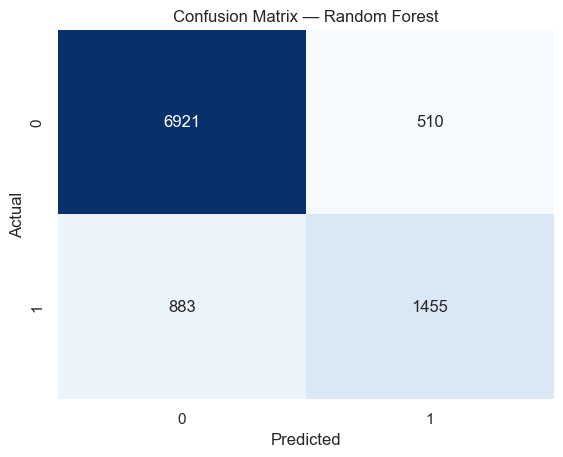

In [57]:
# Confusion matrix heatmap
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optimizing Decision Threshold for High Precision (Random Forest)

In [58]:
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1].astype(float)
candidates = [0.50, 0.55, 0.60, 0.65]
best = None

In [59]:
for thr in candidates:
    y_pred_thr = (y_prob_rf >= thr).astype(int)
    acc = accuracy_score(y_test, y_pred_thr)
    cm = confusion_matrix(y_test, y_pred_thr)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    print(f"thr={thr:.2f} -> Acc: {acc:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, CM: {cm.tolist()}")
    if best is None or precision > best[0]:
        best = (precision, recall, acc, thr, cm.tolist())

print("\nBest by precision:", {"precision": round(best[0],3), "recall": round(best[1],3), "acc": round(best[2],3), "thr": best[3], "cm": best[4]})

thr=0.50 -> Acc: 0.858, Precision: 0.740, Recall: 0.625, CM: [[6916, 515], [876, 1462]]
thr=0.55 -> Acc: 0.856, Precision: 0.761, Recall: 0.580, CM: [[7004, 427], [982, 1356]]
thr=0.60 -> Acc: 0.855, Precision: 0.788, Recall: 0.537, CM: [[7094, 337], [1082, 1256]]
thr=0.65 -> Acc: 0.851, Precision: 0.813, Recall: 0.492, CM: [[7166, 265], [1187, 1151]]

Best by precision: {'precision': 0.813, 'recall': 0.492, 'acc': 0.851, 'thr': 0.65, 'cm': [[7166, 265], [1187, 1151]]}


In [60]:
CHOSEN_THR = float(best[3])

In [61]:
y_pred_final = (y_prob_rf >= CHOSEN_THR).astype(int)

In [62]:
acc = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 

In [63]:
print(f"Final (thr={CHOSEN_THR:.2f}) -> Acc: {acc:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}")
print("Confusion matrix:\n", cm)

Final (thr=0.65) -> Acc: 0.851, Precision: 0.813, Recall: 0.492
Confusion matrix:
 [[7166  265]
 [1187 1151]]


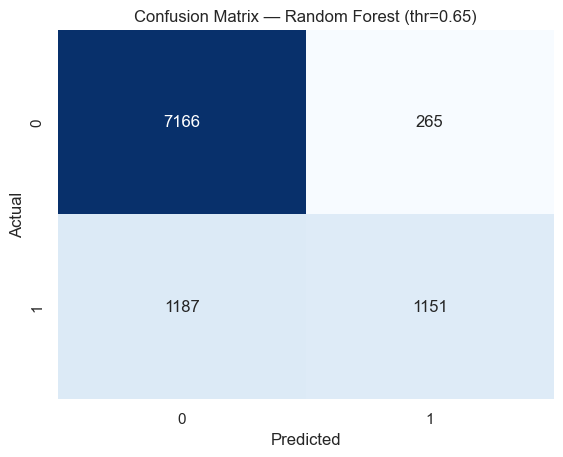

In [64]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — Random Forest (thr={CHOSEN_THR})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Support Vector Machine (SVM)

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
svm_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", SVC(kernel="rbf", random_state=42))
])

In [67]:
svm_model.fit(X_train, y_train) #train

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
y_pred_svm = svm_model.predict(X_test) #predict

In [69]:
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [70]:
tn, fp, fn, tp = cm_svm.ravel()
precision_svm = tp / (tp + fp) 
recall_svm = tp / (tp + fn) 

In [71]:
print(f"SVM — Accuracy: {acc_svm:.3f}")
print(f"SVM — Precision (class 1): {precision_svm:.3f}")
print(f"SVM — Recall (class 1): {recall_svm:.3f}")
print("SVM — Confusion matrix:\n", cm_svm)

SVM — Accuracy: 0.860
SVM — Precision (class 1): 0.769
SVM — Recall (class 1): 0.591
SVM — Confusion matrix:
 [[7016  415]
 [ 957 1381]]


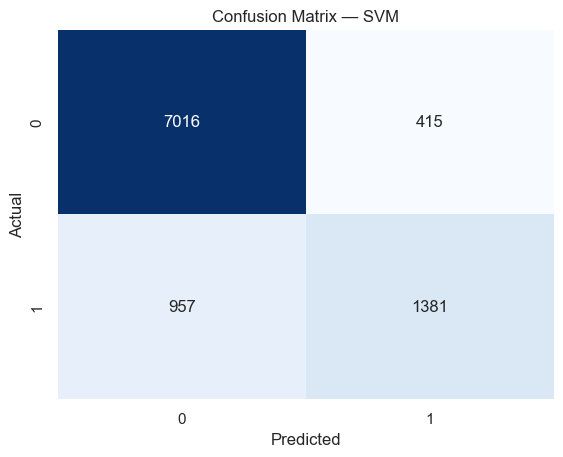

In [72]:
# Confusion matrix heatmap
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Neural Network (Keras)

In [73]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks

In [74]:
input_dim = Xt_train.shape[1]

In [75]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(input_dim,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [93]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │          13,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,889 (85.50 KB)

 Trainable params: 21,889 (85.50 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[keras.metrics.AUC(name="auc"), "accuracy"]
)

In [95]:
early_stopping_cb = callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=5, restore_best_weights=True
)

In [96]:
checkpoint_cb = callbacks.ModelCheckpoint(
    "adult_nn_best.keras", monitor="val_auc", mode="max", save_best_only=True
)

In [97]:
history = model.fit(
    Xt_train, y_train.values,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping_cb, checkpoint_cb],
    verbose=1
)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8229 - auc: 0.8654 - loss: 0.3708 - val_accuracy: 0.8511 - val_auc: 0.9067 - val_loss: 0.3179
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8551 - auc: 0.9110 - loss: 0.3107 - val_accuracy: 0.8543 - val_auc: 0.9096 - val_loss: 0.3135
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8578 - auc: 0.9141 - loss: 0.3053 - val_accuracy: 0.8552 - val_auc: 0.9104 - val_loss: 0.3130
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8598 - auc: 0.9160 - loss: 0.3022 - val_accuracy: 0.8568 - val_auc: 0.9107 - val_loss: 0.3130
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8607 - auc: 0.9175 - loss: 0.2997 - val_accuracy: 0.8576 - val_auc: 0.9108 - val_loss: 0.3132
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8620 - auc: 0.9187 - loss: 0.2974 - val_accuracy: 0.8576 - val_auc: 0.9108 - val_loss: 0.3137
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━

In [98]:
y_prob_nn = model.predict(Xt_test, verbose=0).ravel()
THR_NN = 0.50
y_pred_nn = (y_prob_nn >= THR_NN).astype(int)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cm_nn = confusion_matrix(y_test, y_pred_nn)
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn, zero_division=0)
rec_nn = recall_score(y_test, y_pred_nn, zero_division=0)

print("Confusion matrix (NN):")
print(cm_nn)
print(f"Accuracy={acc_nn:.3f}, Precision={prec_nn:.3f}, Recall={rec_nn:.3f}")

Confusion matrix (NN):
[[6950  481]
 [ 897 1441]]
Accuracy=0.859, Precision=0.750, Recall=0.616


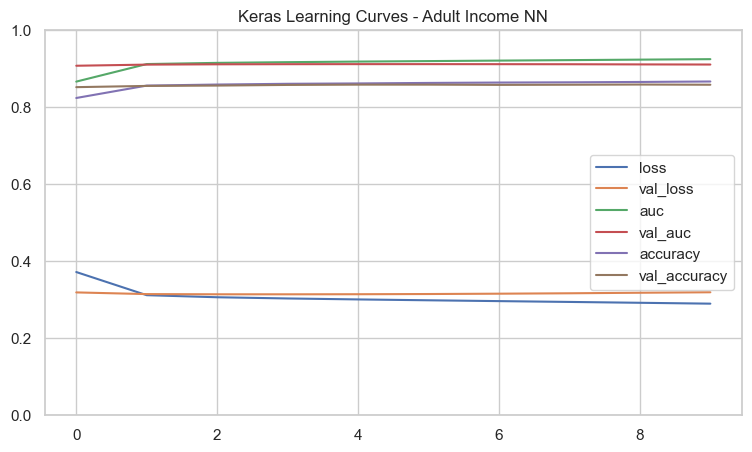

In [100]:
pd.DataFrame(history.history)[["loss","val_loss","auc","val_auc","accuracy","val_accuracy"]].plot(figsize=(9,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Keras Learning Curves - Adult Income NN")
plt.show()

# Chatbot (Telegram)

In [ ]:
# we made a simple telegram chat bot 

import re
import pandas as pd


import joblib, json
rf_clf = joblib.load("adult_rf_pipeline.joblib")
with open("decision_threshold.json","r") as f:
    CHOSEN_THR = json.load(f)["threshold"]
    
# Full schema (same as training)
EXPECTED_COLS = [
    "age", "workclass", "fnlwgt", "education", "educational-num",
    "marital-status", "occupation", "relationship", "race", "gender",
    "capital-gain", "capital-loss", "hours-per-week", "native-country"
]
NUMERIC_COLS = {"age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"}

# Map education -> educational-num (Adult dataset convention)
EDU_TO_NUM = {
    "Preschool": 1, "1st-4th": 2, "5th-6th": 3, "7th-8th": 4, "9th": 5, "10th": 6, "11th": 7,
    "12th": 8, "HS-grad": 9, "Some-college": 10, "Assoc-voc": 11, "Assoc-acdm": 12,
    "Bachelors": 13, "Masters": 14, "Prof-school": 15, "Doctorate": 16
}

# Sensible defaults for non-required fields
DEFAULTS_ULTRA = {
    "workclass": "Private",
    "fnlwgt": 190000,
    "marital-status": "Never-married",
    "occupation": "Other-service",
    "relationship": "Unmarried",
    "race": "White",
    "gender": "Male",
    "capital-gain": 0.0,
    "capital-loss": 0.0,
    "hours-per-week": 40.0,  
    "native-country": "United-States",
}

REQUIRED_MIN_ULTRA = ["age", "education", "hours-per-week"]

def _parse_ultra_to_full_df(msg: str) -> pd.DataFrame:
    # start with all None then overlay defaults
    row = {c: None for c in EXPECTED_COLS}
    row.update(DEFAULTS_ULTRA)

    # parse provided key=value pairs
    for part in re.split(r"[;,]\s*", (msg or "").strip()):
        if "=" in part:
            k, v = part.split("=", 1)
            k, v = k.strip(), v.strip()
            # case-insensitive column match
            col = next((c for c in EXPECTED_COLS if c.lower() == k.lower()), None)
            if col:
                if col in NUMERIC_COLS:
                    try:
                        row[col] = float(v)
                    except:
                        row[col] = None
                else:
                    row[col] = v

    # validate 3 required fields
    missing = [c for c in REQUIRED_MIN_ULTRA if row.get(c) in [None, ""]]
    if missing:
        raise ValueError("Missing required: " + ", ".join(missing))

    # derive educational-num from education if not provided
    if not row.get("educational-num") and row.get("education"):
        row["educational-num"] = EDU_TO_NUM.get(str(row["education"]), 10)  # fallback Some-college

    return pd.DataFrame([row], columns=EXPECTED_COLS)

def chat(message: str) -> str:
    try:
        df = _parse_ultra_to_full_df(message)
    except ValueError as e:
        return str(e)

    prob = rf_clf.predict_proba(df)[:, 1][0]
    pred = ">50K" if prob >= CHOSEN_THR else "<=50K"
    return f"{pred} | P(>50K)={prob:.2f} | thr={CHOSEN_THR}"

In [ ]:
print(chat("age=39, education=Bachelors, hours-per-week=40"))

In [ ]:
ALIASES = {
    "sex": "gender",
    "country": "native-country",
    "edu-num": "educational-num",
    "educational_num": "educational-num",
    "hours": "hours-per-week",
}

def _normalize_key(k: str) -> str:
    k_low = k.strip().lower()
    for col in EXPECTED_COLS:
        if col.lower() == k_low:
            return col
    if k_low in ALIASES:
        return ALIASES[k_low]
    return None  # unknown key

# Use _normalize_key inside _parse_kv_to_df to map keys.

In [ ]:
from telegram.ext import ContextTypes

def _help_text():
    return (
        "Format: key=value, comma-separated.\n"
        "Required: age, education, hours-per-week\n"
        "Example: age=39, education=Bachelors, hours-per-week=40"
    )

async def start(update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text("Income prediction bot.\n" + _help_text())

async def help_cmd(update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text(_help_text())

async def predict(update, context: ContextTypes.DEFAULT_TYPE):
    msg = (update.message.text or "").strip()
    if not msg or msg.startswith("/"):
        await update.message.reply_text(_help_text())
        return
    reply = chat(msg)  # this calls your 3-key chat()
    await update.message.reply_text(reply)

In [ ]:
import logging, nest_asyncio, asyncio
from telegram.ext import ApplicationBuilder, CommandHandler, MessageHandler, filters

logging.basicConfig(level=logging.INFO)
TOKEN = "8473782946:AAG5AdJHqdaLjcCPAIwDjbUdoi42bkUH7U4"  # paste your BotFather token here

app = ApplicationBuilder().token(TOKEN).build()
app.add_handler(CommandHandler("start", start))
app.add_handler(CommandHandler("help", help_cmd))
app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, predict))

nest_asyncio.apply()

async def run_bot():
    print("Bot is running... Stop the cell to end.")
    await app.initialize()
    await app.start()
    await app.updater.start_polling()
    try:
        while True:
            await asyncio.sleep(1)
    finally:
        await app.updater.stop()
        await app.stop()
        await app.shutdown()

await run_bot()

# Project Wrap-up

**Logistic Regression (thr=0.80): Accuracy=0.849 , Precision=0.762 , Recall=0.538**

**Random Forest (thr=0.65): Accuracy=0.851 , Precision=0.813 , Recall=0.492**

**SVM : Accuracy=0.860 , Precision=0.769 , Recall=0.591**

**Neural Network (thr=0.50) : Accuracy=0.858 , Precision=0.751 , Recall=0.609**



**SVM delivered the highest overall accuracy in our runs, indicating strong generalization with default settings.**

**Random Forest, after threshold adjustment, achieved the highest precision among the classical models, which suits use cases where reducing false positives is a priority.**

**Logistic Regression provided a good recall at default threshold and can be tuned via threshold for different precision/recall trade-offs.**

**The Neural Network matched competitively with minimal tuning; with hyperparameter tuning it may improve further.**


**We choose Random Forest with thr=0.65 for deployment because it offers the best precision while maintaining competitive accuracy, aligning with our objective to minimize false positives. If overall accuracy were the main objective, SVM would be preferred.**

**Future work: hyperparameter tuning, probability calibration, and fairness checks.**

**We built a lightweight Telegram chatbot for interactive inference.**

**It parses key=value inputs, applies our preprocessing + model, and returns the predicted class.**

**Responses include a brief confidence-style summary.**